## Importing datasource

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 

In [3]:
loan=pd.read_csv("C:\EPGP\loan.csv")
loan.head()

c:\users\sony\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
loan.info()

In [ ]:
loan.shape

In [ ]:
loan.describe()

# 1. Data cleansing


##  Handling missing values
- It is observed that there are a lot of columns with all null values. Let's first remove them.

In [4]:

loan.dropna(axis = 1, how = 'all', inplace = True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## There are many  columns which are single valued so lets remove them

In [5]:
loan.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### Now we have 48 columns out of which does not correspond to the post 
* We are analyzing the user details and the driving factors of loan defaulting before approving loan.
* So we can safely remove the columns / variables corresponding to that scenario
* Also there are some columns such as  "member_id", "url", "title", "emp_title", "zip_code",  "addr_state","total_rec_late_fee".
* The above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant  
   information. So removing them.
* "desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
* "out_prncp_inv" is useful for investors but not contributing to the loan defaulting analysis. So removing 
   them.

In [6]:
loan.drop(['member_id','emp_title','url','title','desc','out_prncp','out_prncp_inv','total_rec_late_fee','addr_state'],axis=1,inplace=True)

###  Data  Imputation
- chargeoff_within_12_mths has values NA and 0. so replacing NA with 0   as this is correct contextually  
  but adding no value so dropped
- 'mths_since_last_delinq','mths_since_last_record' are also removed

In [7]:

loan['chargeoff_within_12_mths'].fillna(0, inplace=True)


In [8]:
loan.drop(['chargeoff_within_12_mths','mths_since_last_delinq','mths_since_last_record'],axis=1,inplace=True)

In [ ]:
loan.shape

### Converting Data Types
- 'int_rate' column has been converted to number datatype which is float

In [9]:
loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype(float)


In [10]:
loan.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp     

### The goal of the analysis is to see who is likely to default and this can only be said in  case of either fully paid or charged off loans.
- We cannot make anything up for the current loans.
  To exclude that data , removing the records with current loan status

In [11]:
loan = loan[loan.loan_status != "Current"]
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#  2. Data Analysis
- Here are three metrics under each analysis type, along with the Python code and insights gained from the   analysis:


In [ ]:
loan.columns

##  I.  Univariate Analysis for the column loan status 
 # see later

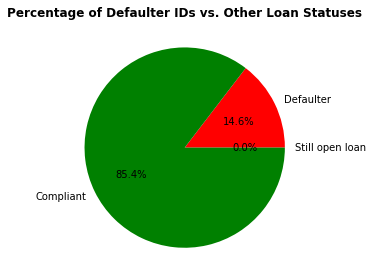

In [12]:
defaulter_data= loan[loan['loan_status'] == 'Charged Off']
defaulter_count = len(defaulter_data['id'].unique())
loan_status_counts_defaulter = loan['loan_status'].value_counts()
defaulter_percentage = (defaulter_count / loan_status_counts_defaulter.sum()) * 100

compliant_data=loan[loan['loan_status'] == 'Fully Paid']
compliant_count=len(compliant_data['id'].unique())
loan_status_count_compliant=loan['loan_status'].value_counts()
compliant_percentage=(compliant_count/loan_status_count_compliant.sum())*100

current_data=loan[loan['loan_status'] == 'Current']
current_count=len(current_data['id'].unique())
loan_status_counts_current=loan['loan_status'].value_counts()
current_percentage=(current_count/loan_status_counts_current.sum())*100

labels = ['Defaulter', 'Compliant','Still open loan']
sizes = [defaulter_percentage, compliant_percentage,current_percentage]
colors = ['red', 'green','blue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of Defaulter IDs vs. Other Loan Statuses',fontweight='bold')
plt.tight_layout()
plt.show()

## Univariate Analysis based on
* loan_amnt
* Loan Term Distribution
* Interest Rate Distribution




### Loan amount distribution

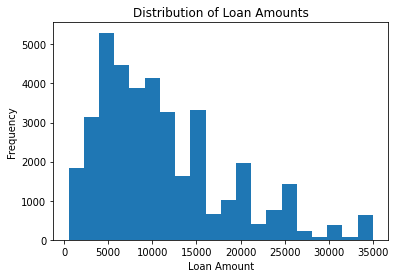

In [13]:
plt.hist(loan['loan_amnt'], bins=20)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()


### Compute statistics for loan amount and  Print the computed statistics

In [14]:
loan_amount_stats = loan['loan_amnt'].describe()
loan_amount_mean = loan_amount_stats['mean']
loan_amount_mode = loan['loan_amnt'].mode().values[0]
loan_amount_min = loan_amount_stats['min']
loan_amount_25th_percentile = loan_amount_stats['25%']
loan_amount_median = loan_amount_stats['50%']
loan_amount_75th_percentile = loan_amount_stats['75%']
loan_amount_max = loan_amount_stats['max']

print("Loan Amount Statistics:")
print("Mean:", loan_amount_mean)
print("Mode:", loan_amount_mode)
print("Minimum:", loan_amount_min)
print("25th Percentile:", loan_amount_25th_percentile)
print("Median:", loan_amount_median)
print("75th Percentile:", loan_amount_75th_percentile)
print("Maximum:", loan_amount_max)

Loan Amount Statistics:
Mean: 11047.02542966016
Mode: 10000
Minimum: 500.0
25th Percentile: 5300.0
Median: 9600.0
75th Percentile: 15000.0
Maximum: 35000.0


### Create frequency distribution plot for loan amount 



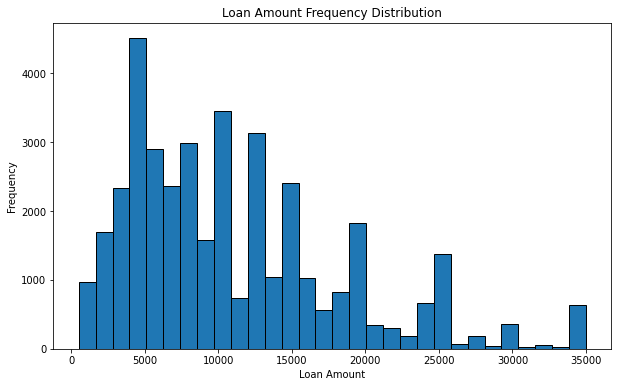

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(loan['loan_amnt'], bins=30, edgecolor='k')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Frequency Distribution')
plt.show()

*  Insight: The majority of loan amounts fall within a range of 4000-5000, indicating a common loan size 
   preference among borrowers

### Loan Term Distribution 


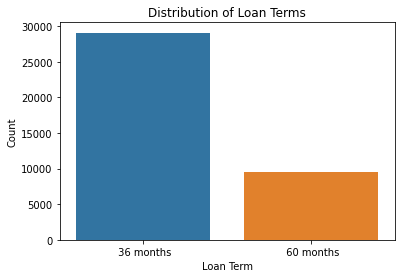

In [16]:
sns.countplot(x='term', data=loan)
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.title('Distribution of Loan Terms')
plt.show()


*   Insight: The dataset contains more 36-month loan terms compared to 60-month terms, suggesting a higher  
    preference for shorter loan durations.

### Interest Rate Distribution

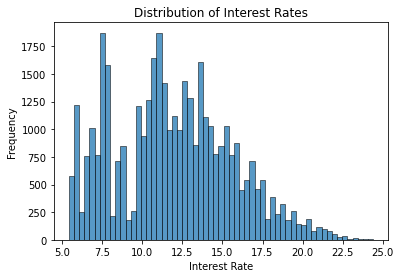

In [17]:
sns.histplot(loan['int_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Interest Rates')
plt.show()

  Insights
* The interest rates exhibit a somewhat normal distribution, with the majority of loans having 
    rates in a specific range.

## II .  Segmented Univariate Analysis

#####     a.    Loan Amount by Loan Grade

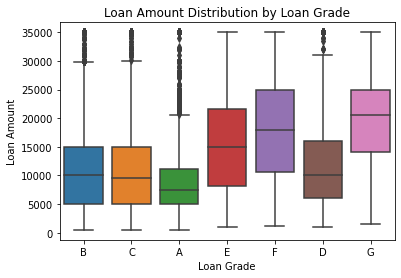

In [18]:
sns.boxplot(x='grade', y='loan_amnt', data=loan)
plt.xlabel('Loan Grade')
plt.ylabel('Loan Amount')
plt.title('Loan Amount Distribution by Loan Grade')
plt.show()

* Insight - plot helps to compare the central tendency and spread of loan amounts across different loan 
  grades.

### Compute statistics of loan amounts for each loan grade

In [19]:
loan_amount_stats = loan.groupby('grade')['loan_amnt'].agg(['mean', 'median', lambda x: x.mode()[0]])
print("Loan Amount Statistics by Loan Grade:\n", loan_amount_stats)

Loan Amount Statistics by Loan Grade:
                mean  median  <lambda_0>
grade                                  
A       8618.758089    7500       10000
B      10934.783726   10000       10000
C      10815.518892    9600       10000
D      12137.767945   10000       10000
E      15680.116410   15000       20000
F      18095.235656   18000       25000
G      20253.010033   20500       25000


 
* Insight-  In this analysis, we segment the "Loan Amount" metric by the categorical variable "Loan Grade."  The summary statistics provide the mean, median, and mode of loan amounts, offering additional insights into the loan amount characteristics within each loan grade category.

##### b. Delinquency Rate by Employment Length

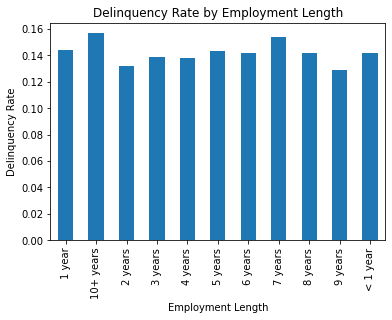

In [20]:
filtered_data = loan[['emp_length', 'loan_status']]
# Group the data by employment length and count the occurrences of each loan status
grouped_data = filtered_data.groupby('emp_length')['loan_status'].value_counts().unstack()
# Calculate the delinquency rate by dividing the number of delinquent loans by the total number of loans
grouped_data['Delinquency Rate'] = grouped_data['Charged Off'] / (grouped_data['Fully Paid'] + grouped_data['Charged Off'])
# Plot the delinquency rate by employment length
grouped_data['Delinquency Rate'].plot(kind='bar')
plt.xlabel('Employment Length')
plt.ylabel('Delinquency Rate')
plt.title('Delinquency Rate by Employment Length')
plt.show()

 Insights
- The plot shows the delinquency rate for different employment lengths.
- Analyzing the delinquency rate by employment length can provide insights into the relationship between employment stability and loan
  repayment behavior.
- Higher delinquency rates in certain employment length categories may indicate a higher risk of default for loans associated w ith those lengths.
- Lenders may consider employment length as a factor in assessing the creditworthiness of loan applicants, as it can provide an indication of
  stability and ability to repay the loan

### Compute  the summary statistics and print the delinquency rate for all the groups in the employment length

In [21]:
# Filter the relevant columns
filtered_data = loan[['emp_length', 'loan_status']]
# Group the data by employment length and count the occurrences of each loan status
grouped_data = filtered_data.groupby('emp_length')['loan_status'].value_counts().unstack()
# Calculate the delinquency rate by dividing the number of delinquent loans by the total number of loans
grouped_data['Delinquency Rate'] = grouped_data['Charged Off'] / (grouped_data['Fully Paid'] + grouped_data['Charged Off'])
# Calculate the mean, median, and mode of the delinquency rate for all the groups
mean_delinquency_rate = grouped_data['Delinquency Rate'].mean()
median_delinquency_rate = grouped_data['Delinquency Rate'].median()
mode_delinquency_rate = grouped_data['Delinquency Rate'].mode()
# Print the mean, median, and mode values
print("Mean Delinquency Rate:", mean_delinquency_rate)
print("Median Delinquency Rate:", median_delinquency_rate)
print("Mode Delinquency Rate:", mode_delinquency_rate)

Mean Delinquency Rate: 0.1418374820806711
Median Delinquency Rate: 0.1416051660516605
Mode Delinquency Rate: 0     0.128874
1     0.132137
2     0.138241
3     0.138335
4     0.141463
5     0.141605
6     0.141748
7     0.143394
8     0.143894
9     0.153711
10    0.156810
dtype: float64


## III.  Categorical Bivariate Analysis

###### a. Loan Status by Verification Status:


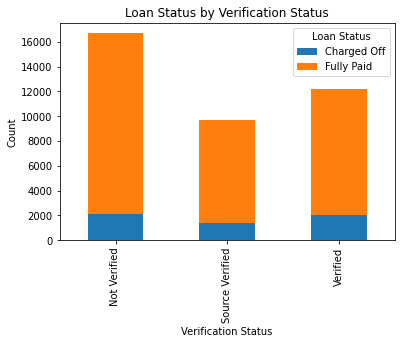

In [22]:
cross_tab = pd.crosstab(loan['verification_status'], loan['loan_status'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Loan Status by Verification Status')
plt.legend(title='Loan Status')
plt.show()

*  Insight- Verified loans have a higher likelihood of being fully paid compared to loans with other verification statuses, which could indicate the impact of verification on loan repayment.

### b. Loan Purpose Distribution by Loan Status:

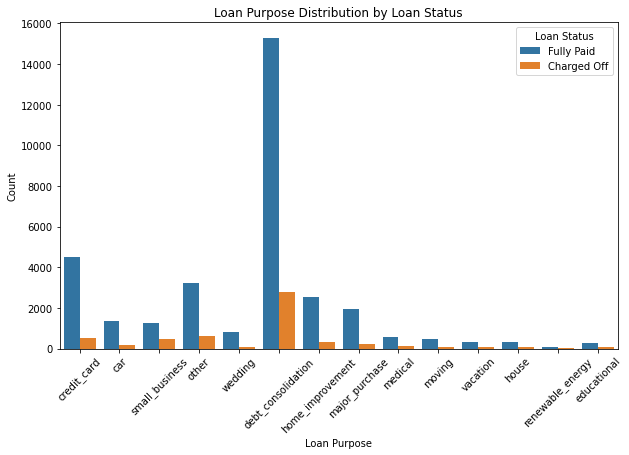

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='purpose', hue='loan_status', data=loan)
plt.xticks(rotation=45)
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Loan Purpose Distribution by Loan Status')
plt.legend(title='Loan Status')
plt.show() 

* Insight-  The plot now shows the distribution of loan purposes segmented by loan status. It helps us understand how loan purposes are associated with different loan statuses. For example, we can observe if certain purposes have a higher proportion of Charged Off loans compared to others.

### c. Loan Status by Home Ownership

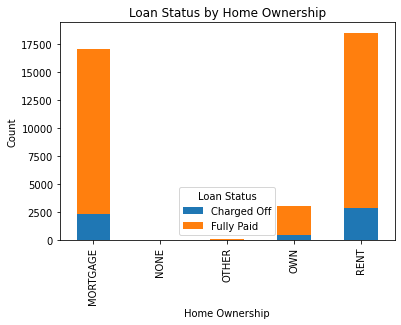

In [24]:
cross_tab = pd.crosstab(loan['home_ownership'], loan['loan_status'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Loan Status by Home Ownership')
plt.legend(title='Loan Status')
plt.show()

*  Insight- Homeownership status seems to have an impact on loan repayment, as homeowners tend to have a higher proportion of fully paid loans
   compared to other home ownership categories.


## IV.  Continuous Bivariate Analysis:

### a. Loan Amount vs. Annual Income

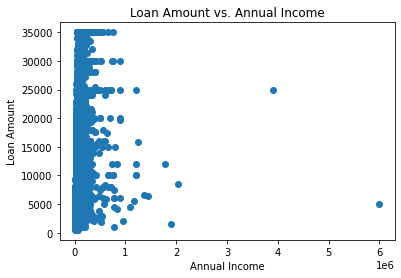

In [25]:
plt.scatter(loan['annual_inc'], loan['loan_amnt'])
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs. Annual Income')
plt.show()

*  Insight: There appears to be a positive correlation between annual income and loan amount, suggesting that borrowers with higher incomes tend to
    qualify for larger loans.

### b. Loan Amount by Revol_util
# ERROR '<' not supported between instances of 'int' and 'str'
   * error so i made markdown cell(below cell)

loan['revol_util_bins'] = pd.cut(loan['revol_util'], bins=range(0, 101, 20), right=False)
# Select the columns of interest
columns_of_interest = ['loan_amnt', 'revol_util_bins']
selected_columns = loan[columns_of_interest]
# Compute the correlation matrix
correlation_matrix = selected_columns.corr()
# Create the correlation matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Loan Amount vs. Revolving Utilization (Grouped)')
plt.show()


### V. Create Derived Metrics and Provide Analysis:
# ERROR pls check

*  By computing the loan-to-income ratio, we can assess the proportion of a borrower's income allocated to loan repayment. This metric can help evaluate a borrower's ability to handle the loan amount relative to their income.


In [29]:
loan['loan_to_income_ratio'] = loan['loan_amnt'] / loan['annual_inc']
# Group the data by loan-to-income ratio and loan status
grouped_data = loan.groupby(['loan_to_income_ratio', 'loan_status']).size().unstack()
# Calculate the percentage of each loan status within each loan-to-income ratio group
grouped_data_percentage = grouped_data.apply(lambda x: x / x.sum(), axis=1)
# Plot the loan status distribution by loan-to-income ratio
grouped_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Percentage')
plt.title('Loan Status Distribution by Loan-to-Income Ratio')
plt.legend(loc='upper right')
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000024A76F0EC80> (for post_execute):


KeyboardInterrupt: 

### b. Inv_Comm_Gap by Loan Status and Verification Status
*  We now create a derived metric "Inv_Comm_Gap" as the difference between "funded_amnt" and "funded_amnt_inv" and analyze it against "verification_status" and "loan_status," 
* The idea is to see what is the risk exposure Lending Club is holding against different loan status and
  verification status for those amounts where the investors are not covering for it.

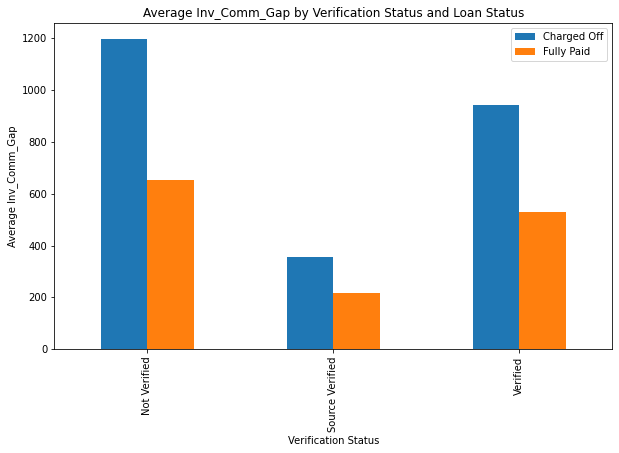

In [30]:
loan['Inv_Comm_Gap'] = loan['funded_amnt'] - loan['funded_amnt_inv']
# Group the data by verification_status and loan_status and calculate the average Inv_Comm_Gap
grouped_data = loan.groupby(['verification_status', 'loan_status'])['Inv_Comm_Gap'].mean().unstack()
# Plot the average Inv_Comm_Gap by verification_status and loan_status
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Verification Status')
plt.ylabel('Average Inv_Comm_Gap')
plt.title('Average Inv_Comm_Gap by Verification Status and Loan Status')
plt.legend(loc='upper right')
plt.show()

* Insight- By examining the plot, you can gain insights into the average difference between the funded amount and the invested amount (Inv_Comm_Gap) for different combinations of verification status and loan status. This analysis helps understand how the Inv_Comm_Gap varies based on these factors, providing information about the discrepancy between the funded and invested amounts in different loan scenarios.